In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cases_us_full = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths_us_full = pd.read_csv('time_series_covid19_deaths_US.csv')
pop_us = pd.read_csv('DECENNIALSF12010.P1_data_with_overlays_2021-12-03T213906.csv')

In [3]:
cases_us_full.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,10407,10419,10423,10439,10457,10468,10471,10477,10495,10508
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,37875,37891,37914,37940,37959,37981,37986,38000,38014,38042
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,3648,3653,3655,3659,3660,3683,3687,3688,3690,3691
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4317,4323,4325,4328,4333,4337,4337,4337,4338,4339
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,10536,10548,10568,10598,10621,10626,10636,10640,10659,10696


In [4]:
x=cases_us_full.columns.to_list()

In [5]:
cases_us = cases_us_full[[x[0],x[5],x[6],x[7],x[8],x[9],x[-1]]].copy()
cases_us['ID'] = cases_us['UID'].astype(str).str[-5:]
cases_us['ID'].astype(int)

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3337    56039
3338    56041
3339    90056
3340    56043
3341    56045
Name: ID, Length: 3342, dtype: int32

In [6]:
cases_us.dtypes

UID                 int64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
11/24/21            int64
ID                 object
dtype: object

In [7]:
cases_us

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID
0,84001001,Autauga,Alabama,US,32.539527,-86.644082,10508,01001
1,84001003,Baldwin,Alabama,US,30.727750,-87.722071,38042,01003
2,84001005,Barbour,Alabama,US,31.868263,-85.387129,3691,01005
3,84001007,Bibb,Alabama,US,32.996421,-87.125115,4339,01007
4,84001009,Blount,Alabama,US,33.982109,-86.567906,10696,01009
...,...,...,...,...,...,...,...,...
3337,84056039,Teton,Wyoming,US,43.935225,-110.589080,5366,56039
3338,84056041,Uinta,Wyoming,US,41.287818,-110.547578,4024,56041
3339,84090056,Unassigned,Wyoming,US,0.000000,0.000000,0,90056
3340,84056043,Washakie,Wyoming,US,43.904516,-107.680187,1845,56043


In [8]:
y=deaths_us_full.columns.to_list()

In [9]:
deaths_us = deaths_us_full[[y[0],y[5],y[6],y[7],y[8],y[9],y[-1]]].copy()
deaths_us['ID'] = deaths_us['UID'].astype(str).str[-5:]
deaths_us['ID'].astype(int)

0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3337    56039
3338    56041
3339    90056
3340    56043
3341    56045
Name: ID, Length: 3342, dtype: int32

In [10]:
pop_us=pop_us.drop([0])

In [11]:
pop_us=pop_us.rename(columns={'P001001':'Population'})
pop_us['pop_ID']=pop_us['GEO_ID'].str[-5:]
pop_us['pop_ID'].astype(int)
#pop_us.head(50)

1        1001
2        1003
3        1005
4        1007
5        1009
        ...  
3217    72145
3218    72147
3219    72149
3220    72151
3221    72153
Name: pop_ID, Length: 3221, dtype: int32

In [12]:
#cleaning to remove the xxxx(rxxx) in the population column
pop_us['Population'].astype(str)
pattern = '\(......\)'
pop_us['Population']=pop_us.Population.str.replace(pat=pattern,repl= "", regex=True)
pop_us['Population'].astype(int)
pop_us['pop_ID'].astype(int)

#pop_us.head(50)

1        1001
2        1003
3        1005
4        1007
5        1009
        ...  
3217    72145
3218    72147
3219    72149
3220    72151
3221    72153
Name: pop_ID, Length: 3221, dtype: int32

In [13]:
pop_us.dtypes

GEO_ID        object
Population    object
NAME          object
pop_ID        object
dtype: object

In [14]:
cases_us=cases_us.merge(pop_us, how='left', left_on='ID', right_on='pop_ID')

In [15]:
deaths_us=deaths_us.merge(pop_us, how='left', left_on='ID', right_on='pop_ID')

In [16]:
cases_us['Population'] = cases_us['Population'].astype(float)

In [17]:
deaths_us['Population'] = deaths_us['Population'].astype(float)

In [18]:
cases_us.dtypes

UID                 int64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
11/24/21            int64
ID                 object
GEO_ID             object
Population        float64
NAME               object
pop_ID             object
dtype: object

In [19]:
cases_us['Cases_Percent']=((cases_us['11/24/21']) / (cases_us['Population']))*100

In [20]:
deaths_us['Deaths_Percent']=((deaths_us['11/24/21']) / (deaths_us['Population']))*100

In [21]:
cases_us.shape

(3342, 13)

In [22]:
cases_us = cases_us.dropna()
cases_us.shape

(3218, 13)

In [23]:
deaths_us.shape

(3342, 13)

In [24]:
deaths_us=deaths_us.dropna()
deaths_us.shape

(3218, 13)

In [25]:
deaths_us.head()

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID,GEO_ID,Population,NAME,pop_ID,Deaths_Percent
0,84001001,Autauga,Alabama,US,32.539527,-86.644082,156,01001,0500000US01001,54571.0,"Autauga County, Alabama",01001,0.285866
1,84001003,Baldwin,Alabama,US,30.727750,-87.722071,589,01003,0500000US01003,182265.0,"Baldwin County, Alabama",01003,0.323156
2,84001005,Barbour,Alabama,US,31.868263,-85.387129,80,01005,0500000US01005,27457.0,"Barbour County, Alabama",01005,0.291365
3,84001007,Bibb,Alabama,US,32.996421,-87.125115,94,01007,0500000US01007,22915.0,"Bibb County, Alabama",01007,0.410212
4,84001009,Blount,Alabama,US,33.982109,-86.567906,192,01009,0500000US01009,57322.0,"Blount County, Alabama",01009,0.334950


In [26]:
cases_us.head()

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID,GEO_ID,Population,NAME,pop_ID,Cases_Percent
0,84001001,Autauga,Alabama,US,32.539527,-86.644082,10508,01001,0500000US01001,54571.0,"Autauga County, Alabama",01001,19.255649
1,84001003,Baldwin,Alabama,US,30.727750,-87.722071,38042,01003,0500000US01003,182265.0,"Baldwin County, Alabama",01003,20.871808
2,84001005,Barbour,Alabama,US,31.868263,-85.387129,3691,01005,0500000US01005,27457.0,"Barbour County, Alabama",01005,13.442838
3,84001007,Bibb,Alabama,US,32.996421,-87.125115,4339,01007,0500000US01007,22915.0,"Bibb County, Alabama",01007,18.935195
4,84001009,Blount,Alabama,US,33.982109,-86.567906,10696,01009,0500000US01009,57322.0,"Blount County, Alabama",01009,18.659502


In [27]:
#sns.barplot(data=cases_us, x='NAME', y='Cases_Percent', order=)

<AxesSubplot:xlabel='Cases_Percent', ylabel='Count'>

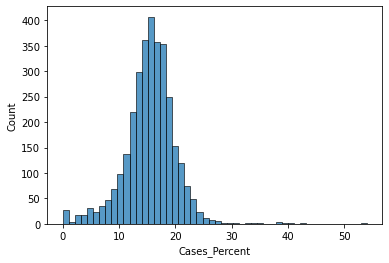

In [28]:
sns.histplot(data=cases_us, x='Cases_Percent', bins=50)
#, hue='Province_State'

<AxesSubplot:xlabel='Deaths_Percent', ylabel='Count'>

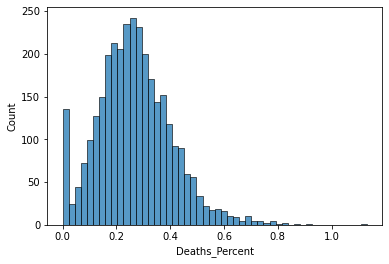

In [29]:
sns.histplot(data=deaths_us, x='Deaths_Percent', bins=50)
#, hue='Province_State'

In [30]:
#need to get data for county sq mi. to display 50th percentile and above as "rural" 
#and a different hue to determine if ppl/sq mi has an impact on cases

In [33]:
land_full=pd.read_excel('LND01.xls')
land_full.head()

,Areaname,STCOU,LND010190F,LND010190D,LND010190N1,LND010190N2,LND010200F,LND010200D,LND010200N1,LND010200N2,...,LND110210N1,LND110210N2,LND210190F,LND210190D,LND210190N1,LND210190N2,LND210200F,LND210200D,LND210200N1,LND210200N2
0,UNITED STATES,0,0,3787425.08,0,0,0,3794083.06,0,0,...,0,0,0,251083.35,0,0,0,256644.62,0,0
1,ALABAMA,1000,0,52422.94,0,0,0,52419.02,0,0,...,0,0,0,1672.71,0,0,0,1675.01,0,0
2,"Autauga, AL",1001,0,604.49,0,0,0,604.45,0,0,...,0,0,0,8.48,0,0,0,8.48,0,0
3,"Baldwin, AL",1003,0,2027.08,0,0,0,2026.93,0,0,...,0,0,0,430.55,0,0,0,430.58,0,0
4,"Barbour, AL",1005,0,904.59,0,0,0,904.52,0,0,...,0,0,0,19.59,0,0,0,19.61,0,0


In [34]:
land=land_full[['Areaname', 'STCOU', 'LND110210D']]
land.head()
#LND in sq miles

,Areaname,STCOU,LND110210D
0,UNITED STATES,0,3531905.43
1,ALABAMA,1000,50645.33
2,"Autauga, AL",1001,594.44
3,"Baldwin, AL",1003,1589.78
4,"Barbour, AL",1005,884.88


In [35]:
deaths_us.dtypes

UID                 int64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
11/24/21            int64
ID                 object
GEO_ID             object
Population        float64
NAME               object
pop_ID             object
Deaths_Percent    float64
dtype: object

In [36]:
cases_us.dtypes

UID                 int64
Admin2             object
Province_State     object
Country_Region     object
Lat               float64
Long_             float64
11/24/21            int64
ID                 object
GEO_ID             object
Population        float64
NAME               object
pop_ID             object
Cases_Percent     float64
dtype: object

In [37]:
land.dtypes

Areaname       object
STCOU           int64
LND110210D    float64
dtype: object

In [38]:
land['STCOU'] = land['STCOU'].astype(float)
cases_us['ID'] = cases_us['ID'].astype(float)
deaths_us['ID'] = deaths_us['ID'].astype(float)


C:\Users\mvesc\AppData\Local\Temp/ipykernel_5476/2481903886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land['STCOU'] = land['STCOU'].astype(float)


In [39]:
cases_us=cases_us.merge(land, how='left', left_on='ID', right_on='STCOU')

In [40]:
cases_us

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID,GEO_ID,Population,NAME,pop_ID,Cases_Percent,Areaname,STCOU,LND110210D
0,84001001,Autauga,Alabama,US,32.539527,-86.644082,10508,1001.0,0500000US01001,54571.0,"Autauga County, Alabama",01001,19.255649,"Autauga, AL",1001.0,594.44
1,84001003,Baldwin,Alabama,US,30.727750,-87.722071,38042,1003.0,0500000US01003,182265.0,"Baldwin County, Alabama",01003,20.871808,"Baldwin, AL",1003.0,1589.78
2,84001005,Barbour,Alabama,US,31.868263,-85.387129,3691,1005.0,0500000US01005,27457.0,"Barbour County, Alabama",01005,13.442838,"Barbour, AL",1005.0,884.88
3,84001007,Bibb,Alabama,US,32.996421,-87.125115,4339,1007.0,0500000US01007,22915.0,"Bibb County, Alabama",01007,18.935195,"Bibb, AL",1007.0,622.58
4,84001009,Blount,Alabama,US,33.982109,-86.567906,10696,1009.0,0500000US01009,57322.0,"Blount County, Alabama",01009,18.659502,"Blount, AL",1009.0,644.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,84056037,Sweetwater,Wyoming,US,41.659439,-108.882788,8064,56037.0,0500000US56037,43806.0,"Sweetwater County, Wyoming",56037,18.408437,"Sweetwater, WY",56037.0,10426.65
3214,84056039,Teton,Wyoming,US,43.935225,-110.589080,5366,56039.0,0500000US56039,21294.0,"Teton County, Wyoming",56039,25.199587,"Teton, WY",56039.0,3995.38
3215,84056041,Uinta,Wyoming,US,41.287818,-110.547578,4024,56041.0,0500000US56041,21118.0,"Uinta County, Wyoming",56041,19.054835,"Uinta, WY",56041.0,2081.26
3216,84056043,Washakie,Wyoming,US,43.904516,-107.680187,1845,56043.0,0500000US56043,8533.0,"Washakie County, Wyoming",56043,21.621938,"Washakie, WY",56043.0,2238.55


In [41]:
deaths_us=deaths_us.merge(land, how='left', left_on='ID', right_on='STCOU')
deaths_us

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID,GEO_ID,Population,NAME,pop_ID,Deaths_Percent,Areaname,STCOU,LND110210D
0,84001001,Autauga,Alabama,US,32.539527,-86.644082,156,1001.0,0500000US01001,54571.0,"Autauga County, Alabama",01001,0.285866,"Autauga, AL",1001.0,594.44
1,84001003,Baldwin,Alabama,US,30.727750,-87.722071,589,1003.0,0500000US01003,182265.0,"Baldwin County, Alabama",01003,0.323156,"Baldwin, AL",1003.0,1589.78
2,84001005,Barbour,Alabama,US,31.868263,-85.387129,80,1005.0,0500000US01005,27457.0,"Barbour County, Alabama",01005,0.291365,"Barbour, AL",1005.0,884.88
3,84001007,Bibb,Alabama,US,32.996421,-87.125115,94,1007.0,0500000US01007,22915.0,"Bibb County, Alabama",01007,0.410212,"Bibb, AL",1007.0,622.58
4,84001009,Blount,Alabama,US,33.982109,-86.567906,192,1009.0,0500000US01009,57322.0,"Blount County, Alabama",01009,0.334950,"Blount, AL",1009.0,644.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,84056037,Sweetwater,Wyoming,US,41.659439,-108.882788,97,56037.0,0500000US56037,43806.0,"Sweetwater County, Wyoming",56037,0.221431,"Sweetwater, WY",56037.0,10426.65
3214,84056039,Teton,Wyoming,US,43.935225,-110.589080,14,56039.0,0500000US56039,21294.0,"Teton County, Wyoming",56039,0.065746,"Teton, WY",56039.0,3995.38
3215,84056041,Uinta,Wyoming,US,41.287818,-110.547578,30,56041.0,0500000US56041,21118.0,"Uinta County, Wyoming",56041,0.142059,"Uinta, WY",56041.0,2081.26
3216,84056043,Washakie,Wyoming,US,43.904516,-107.680187,35,56043.0,0500000US56043,8533.0,"Washakie County, Wyoming",56043,0.410172,"Washakie, WY",56043.0,2238.55


In [42]:
#create col for ppl/sq mi density
#follow deaths_us df thru for land area

cases_us['Pop_Density'] = (cases_us['Population'])/(cases_us['LND110210D'])
deaths_us['Pop_Density'] = (deaths_us['Population'])/(deaths_us['LND110210D'])

In [43]:
deaths_us.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Deaths_Percent,STCOU,LND110210D,Pop_Density
count,3.218000e+03,3218.000000,3218.000000,3218.000000,3218.000000,3.218000e+03,3218.000000,3140.000000,3140.000000,3140.000000
mean,8.352239e+07,37.956602,-91.636082,229.460534,31398.119640,9.709262e+04,0.267486,30387.632484,1118.702166,259.278738
std,3.223699e+06,6.081417,13.331622,810.360917,16286.924134,3.094313e+05,0.138060,15156.372045,3601.799512,1724.871417
min,6.307200e+07,17.982429,-174.159600,0.000000,1001.000000,8.200000e+01,0.000000,1001.000000,2.000000,0.038404
25%,8.401806e+07,34.348720,-98.073681,27.000000,19033.500000,1.135250e+04,0.176263,18178.500000,430.737500,16.957902
50%,8.402910e+07,38.209070,-89.944637,67.000000,30024.000000,2.610850e+04,0.258554,29176.000000,615.595000,45.214209
75%,8.404504e+07,41.686672,-82.989554,165.750000,46106.500000,6.603225e+04,0.349998,45079.500000,923.557500,113.696677
max,8.405604e+07,69.314792,-65.288130,27074.000000,72153.000000,9.818605e+06,1.131542,56045.000000,145504.790000,69464.432764


In [44]:
pd.options.display.max_rows=250
cases_us.sort_values(by='Pop_Density', ascending=False)

#Census Beaaruo defines divide between urban/rural as 1,000 ppl/sq mile

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID,GEO_ID,Population,NAME,pop_ID,Cases_Percent,Areaname,STCOU,LND110210D,Pop_Density
1857,84036061,New York,New York,US,40.767273,-73.971526,175171,36061.0,0500000US36061,1585873.0,"New York County, New York",36061,11.045714,"New York, NY",36061.0,22.83,69464.432764
1850,84036047,Kings,New York,US,40.636182,-73.949356,347208,36047.0,0500000US36047,2504700.0,"Kings County, New York",36047,13.862259,"Kings, NY",36047.0,70.82,35367.127930
1829,84036005,Bronx,New York,US,40.852093,-73.862828,212370,36005.0,0500000US36005,1385108.0,"Bronx County, New York",36005,15.332378,"Bronx, NY",36005.0,42.10,32900.427553
1867,84036081,Queens,New York,US,40.710881,-73.816847,324401,36081.0,0500000US36081,2230722.0,"Queens County, New York",36081,14.542422,"Queens, NY",36081.0,108.53,20553.966645
222,84006075,San Francisco,California,US,37.752151,-122.438567,56614,6075.0,0500000US06075,805235.0,"San Francisco County, California",06075,7.030743,"San Francisco, CA",6075.0,46.87,17180.179219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,63072145,Vega Baja,Puerto Rico,US,18.428262,-66.397924,3973,72145.0,0500000US72145,59662.0,"Vega Baja Municipio, Puerto Rico",72145,6.659180,NaN,NaN,NaN,NaN
2384,63072147,Vieques,Puerto Rico,US,18.123276,-65.440971,194,72147.0,0500000US72147,9301.0,"Vieques Municipio, Puerto Rico",72147,2.085797,NaN,NaN,NaN,NaN
2385,63072149,Villalba,Puerto Rico,US,18.127951,-66.473115,903,72149.0,0500000US72149,26073.0,"Villalba Municipio, Puerto Rico",72149,3.463353,NaN,NaN,NaN,NaN
2386,63072151,Yabucoa,Puerto Rico,US,18.070399,-65.896289,1367,72151.0,0500000US72151,37941.0,"Yabucoa Municipio, Puerto Rico",72151,3.602962,NaN,NaN,NaN,NaN


In [45]:
#remove missing values for Puerto Rico
cases_us=cases_us.dropna(thresh=16)
cases_us.shape

(3140, 17)

In [46]:
cases_us.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Cases_Percent,STCOU,LND110210D,Pop_Density
count,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000
mean,8.403039e+07,38.446382,-92.262781,1.509890e+04,30387.632484,9.831792e+04,15.764715,30387.632484,1118.702166,259.278738
std,1.515637e+04,5.291708,12.881550,4.875439e+04,15156.372045,3.130385e+05,4.198230,15156.372045,3601.799512,1724.871417
min,8.400100e+07,19.601212,-174.159600,0.000000e+00,1001.000000,8.200000e+01,0.000000,1001.000000,2.000000,0.038404
25%,8.401818e+07,34.692998,-98.218115,1.679250e+03,18178.500000,1.111750e+04,13.505568,18178.500000,430.737500,16.957902
50%,8.402918e+07,38.370301,-90.392713,4.103500e+03,29176.000000,2.589000e+04,15.788047,29176.000000,615.595000,45.214209
75%,8.404508e+07,41.796023,-83.436193,1.064550e+04,45079.500000,6.689800e+04,18.081182,45079.500000,923.557500,113.696677
max,8.405604e+07,69.314792,-67.628135,1.522240e+06,56045.000000,9.818605e+06,54.025029,56045.000000,145504.790000,69464.432764


In [47]:
cases_us[cases_us['Admin2'].str.contains('Cambria')]

,UID,Admin2,Province_State,Country_Region,Lat,Long_,11/24/21,ID,GEO_ID,Population,NAME,pop_ID,Cases_Percent,Areaname,STCOU,LND110210D,Pop_Density
2253,84042021,Cambria,Pennsylvania,US,40.495274,-78.713774,22134,42021.0,0500000US42021,143679.0,"Cambria County, Pennsylvania",42021,15.405174,"Cambria, PA",42021.0,688.35,208.729571


<AxesSubplot:xlabel='Pop_Density', ylabel='Count'>

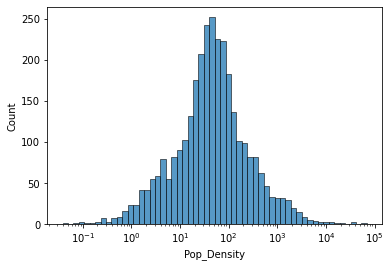

In [48]:
sns.histplot(data=cases_us, x='Pop_Density', bins='auto', log_scale=True)
#log scale

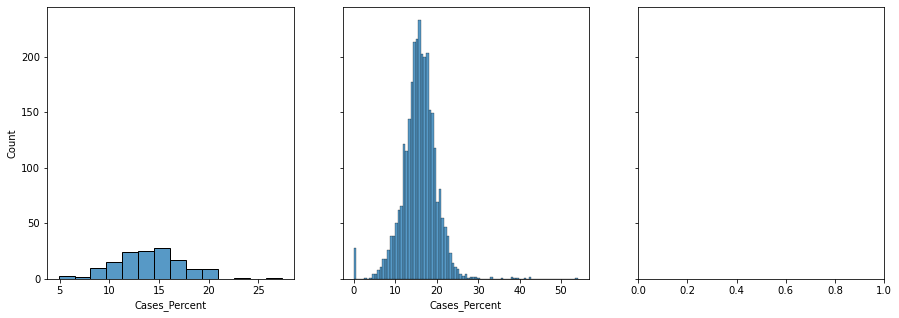

<Figure size 720x720 with 0 Axes>

In [49]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)

casesFilt_urban = cases_us[cases_us['Pop_Density'] > 1000]
casesFilt_rural = cases_us[cases_us['Pop_Density'] <= 1000]

#sns.histplot(data=casesFilt_urban, x='Pop_Density', bins='auto')
sns.histplot(ax=axes[0], data=casesFilt_urban, x='Cases_Percent', bins='auto')

sns.histplot(ax=axes[1], data=casesFilt_rural, x='Cases_Percent', bins='auto')



plt.figure(figsize=(10,10))
plt.show()

In [50]:
casesFilt_urban.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Cases_Percent,STCOU,LND110210D,Pop_Density
count,1.440000e+02,144.000000,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000
mean,8.403365e+07,38.081216,-84.312157,1.168560e+05,33653.375000,8.126163e+05,14.035480,33653.375000,396.060347,3669.257080
std,1.540573e+04,4.036935,14.008288,1.651867e+05,15405.728988,1.060024e+06,3.564705,15405.728988,466.094617,7250.614747
min,8.400600e+07,21.458032,-157.971218,7.100000e+02,6001.000000,5.961000e+03,4.865943,6001.000000,2.000000,1002.911717
25%,8.402182e+07,37.001188,-87.043992,3.037800e+04,21816.000000,2.552688e+05,11.753239,21816.000000,58.315000,1337.394876
50%,8.403606e+07,38.864171,-79.301419,8.413550e+04,36060.000000,6.285305e+05,13.879616,36060.000000,309.065000,1757.211043
75%,8.404953e+07,40.738413,-76.209574,1.361388e+05,49529.500000,9.480795e+05,16.208726,49529.500000,537.540000,2810.141447
max,8.405508e+07,45.547480,-70.946872,1.522240e+06,55079.000000,9.818605e+06,27.418859,55079.000000,4057.880000,69464.432764


In [51]:
casesFilt_rural.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Cases_Percent,STCOU,LND110210D,Pop_Density
count,2.996000e+03,2996.000000,2996.000000,2996.000000,2996.000000,2.996000e+03,2996.000000,2996.000000,2996.000000,2996.000000
mean,8.403023e+07,38.463934,-92.644920,10208.032710,30230.667557,6.398582e+04,15.847829,30230.667557,1153.435284,95.381247
std,1.512914e+04,5.344501,12.702668,25819.881488,15129.144749,1.527871e+05,4.208937,15129.144749,3682.392427,148.983597
min,8.400100e+07,19.601212,-174.159600,0.000000,1001.000000,8.200000e+01,0.000000,1001.000000,6.700000,0.038404
25%,8.401817e+07,34.638692,-98.510647,1611.750000,18170.500000,1.067450e+04,13.628704,18170.500000,440.820000,15.874121
50%,8.402914e+07,38.330505,-90.792980,3897.000000,29140.000000,2.449000e+04,15.861738,29140.000000,628.890000,41.620158
75%,8.404506e+07,41.915239,-83.853252,9265.750000,45061.500000,5.888650e+04,18.139289,45061.500000,934.492500,98.277873
max,8.405604e+07,69.314792,-67.628135,789760.000000,56045.000000,3.817117e+06,54.025029,56045.000000,145504.790000,996.692668


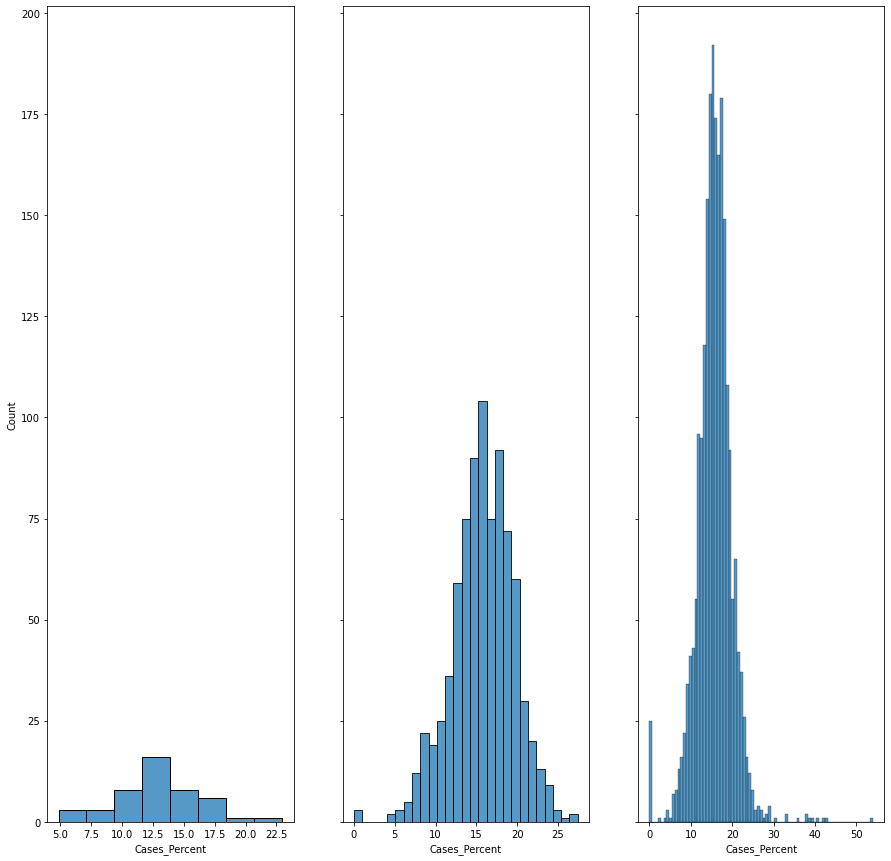

In [52]:
#break the pop density differently and see if more difference

fig, axes = plt.subplots(1,3, figsize=(15,15), sharey=True)


casesFilt_urban2 = cases_us[cases_us['Pop_Density'] > 2500]
casesFilt_middle2 = cases_us[(cases_us['Pop_Density'] > 100) & (cases_us['Pop_Density'] < 2500)]
casesFilt_rural2 = cases_us[cases_us['Pop_Density'] <= 100]

#sns.histplot(data=casesFilt_urban, x='Pop_Density', bins='auto')
sns.histplot(ax=axes[0], data=casesFilt_urban2, x='Cases_Percent', bins='auto')
sns.histplot(ax=axes[1], data=casesFilt_middle2, x='Cases_Percent', bins='auto')
sns.histplot(ax=axes[2], data=casesFilt_rural2, x='Cases_Percent', bins='auto')



#plt.figure(figsize=(20,10))
plt.show()

In [53]:
casesFilt_urban2.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Cases_Percent,STCOU,LND110210D,Pop_Density
count,4.600000e+01,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000
mean,8.403685e+07,39.124072,-80.951528,115245.456522,36848.652174,8.608286e+05,13.069919,36848.652174,175.383696,8215.235790
std,1.487587e+04,2.886151,10.829968,131328.372351,14875.872528,9.773790e+05,3.413540,14875.872528,229.107140,11648.202101
min,8.400606e+07,27.931303,-122.438567,710.000000,6059.000000,7.042000e+03,4.865943,6059.000000,2.000000,2585.742582
25%,8.402772e+07,38.135316,-82.456593,19785.250000,27719.750000,1.865928e+05,11.055096,27719.750000,35.762500,2838.940869
50%,8.403607e+07,39.236332,-77.138503,87805.000000,36071.000000,6.113420e+05,13.178019,36071.000000,69.765000,3924.297754
75%,8.405161e+07,40.760621,-74.333668,153984.250000,51607.500000,1.048228e+06,15.138233,51607.500000,239.302500,7914.126042
max,8.405508e+07,45.016253,-71.078504,669643.000000,55079.000000,5.194675e+06,22.976427,55079.000000,945.330000,69464.432764


In [54]:
casesFilt_rural2.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Cases_Percent,STCOU,LND110210D,Pop_Density
count,2.262000e+03,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000
mean,8.403021e+07,38.684269,-94.504464,3981.138815,30206.274978,24769.076481,15.823019,30206.274978,1306.243895,33.376306
std,1.515156e+04,5.573210,12.382396,5258.768559,15151.562932,30583.496958,4.337137,15151.562932,4184.314584,26.558593
min,8.400100e+07,19.601212,-174.159600,0.000000,1001.000000,82.000000,0.000000,1001.000000,11.990000,0.038404
25%,8.401905e+07,34.530406,-99.870816,1253.500000,19048.000000,8488.500000,13.564354,19048.000000,474.532500,9.962638
50%,8.402913e+07,38.330505,-93.178193,2665.000000,29128.000000,16834.500000,15.830602,29128.000000,686.415000,27.954589
75%,8.404604e+07,42.458140,-85.713483,5033.750000,46042.500000,31951.250000,18.067073,46042.500000,1030.172500,50.694629
max,8.405604e+07,69.314792,-67.628135,85614.000000,56045.000000,442179.000000,54.025029,56045.000000,145504.790000,99.861149


In [55]:
casesFilt_middle2.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Cases_Percent,STCOU,LND110210D,Pop_Density
count,8.320000e+02,832.000000,832.000000,8.320000e+02,832.000000,8.320000e+02,832.000000,832.000000,832.000000,832.000000
mean,8.403052e+07,37.762159,-86.793585,3.978835e+04,30523.478365,2.561208e+05,15.755192,30523.478365,660.977716,433.578349
std,1.512291e+04,4.490551,12.351925,8.042173e+04,15122.911029,4.940057e+05,3.788641,15122.911029,1004.358908,464.747403
min,8.400100e+07,20.863996,-159.596679,0.000000e+00,1003.000000,3.958000e+03,0.000000,1003.000000,5.470000,100.032720
25%,8.401804e+07,34.840110,-89.697506,1.067150e+04,18040.500000,6.958750e+04,13.503812,18040.500000,375.265000,141.664265
50%,8.403301e+07,38.329890,-84.087030,2.003550e+04,33012.000000,1.242865e+05,15.798149,33012.000000,517.460000,242.953737
75%,8.404210e+07,41.114283,-79.687148,3.967950e+04,42095.500000,2.670950e+05,18.313583,42095.500000,715.467500,485.260677
max,8.405514e+07,61.149982,-69.105292,1.522240e+06,55139.000000,9.818605e+06,27.418859,55139.000000,20056.940000,2419.639073


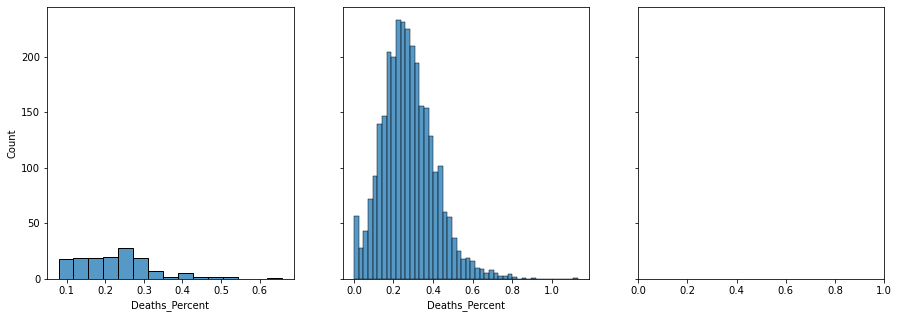

<Figure size 720x720 with 0 Axes>

In [56]:
#Change from cases to deaths

fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True)

deathsFilt_urban = deaths_us[deaths_us['Pop_Density'] > 1000]
deathsFilt_rural = deaths_us[deaths_us['Pop_Density'] <= 1000]

#sns.histplot(data=casesFilt_urban, x='Pop_Density', bins='auto')
sns.histplot(ax=axes[0], data=deathsFilt_urban, x='Deaths_Percent', bins=15)

sns.histplot(ax=axes[1], data=deathsFilt_rural, x='Deaths_Percent', bins='auto')



plt.figure(figsize=(10,10))
plt.show()

In [57]:
deathsFilt_urban.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Deaths_Percent,STCOU,LND110210D,Pop_Density
count,1.440000e+02,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000,144.000000,144.000000,144.000000
mean,8.403365e+07,38.081216,-84.312157,1904.340278,33653.375000,8.126163e+05,0.231619,33653.375000,396.060347,3669.257080
std,1.540573e+04,4.036935,14.008288,2937.510204,15405.728988,1.060024e+06,0.099988,15405.728988,466.094617,7250.614747
min,8.400600e+07,21.458032,-157.971218,13.000000,6001.000000,5.961000e+03,0.078996,6001.000000,2.000000,1002.911717
25%,8.402182e+07,37.001188,-87.043992,371.000000,21816.000000,2.552688e+05,0.155653,21816.000000,58.315000,1337.394876
50%,8.403606e+07,38.864171,-79.301419,1258.500000,36060.000000,6.285305e+05,0.228232,36060.000000,309.065000,1757.211043
75%,8.404953e+07,40.738413,-76.209574,2069.000000,49529.500000,9.480795e+05,0.274266,49529.500000,537.540000,2810.141447
max,8.405508e+07,45.547480,-70.946872,27074.000000,55079.000000,9.818605e+06,0.658418,55079.000000,4057.880000,69464.432764


In [58]:
deathsFilt_rural.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Deaths_Percent,STCOU,LND110210D,Pop_Density
count,2.996000e+03,2996.000000,2996.000000,2996.000000,2996.000000,2.996000e+03,2996.000000,2996.000000,2996.000000,2996.000000
mean,8.403023e+07,38.463934,-92.644920,154.932911,30230.667557,6.398582e+04,0.276174,30230.667557,1153.435284,95.381247
std,1.512914e+04,5.344501,12.702668,389.303195,15129.144749,1.527871e+05,0.134147,15129.144749,3682.392427,148.983597
min,8.400100e+07,19.601212,-174.159600,0.000000,1001.000000,8.200000e+01,0.000000,1001.000000,6.700000,0.038404
25%,8.401817e+07,34.638692,-98.510647,28.000000,18170.500000,1.067450e+04,0.183517,18170.500000,440.820000,15.874121
50%,8.402914e+07,38.330505,-90.792980,66.000000,29140.000000,2.449000e+04,0.264857,29140.000000,628.890000,41.620158
75%,8.404506e+07,41.915239,-83.853252,146.000000,45061.500000,5.888650e+04,0.356377,45061.500000,934.492500,98.277873
max,8.405604e+07,69.314792,-67.628135,12671.000000,56045.000000,3.817117e+06,1.131542,56045.000000,145504.790000,996.692668


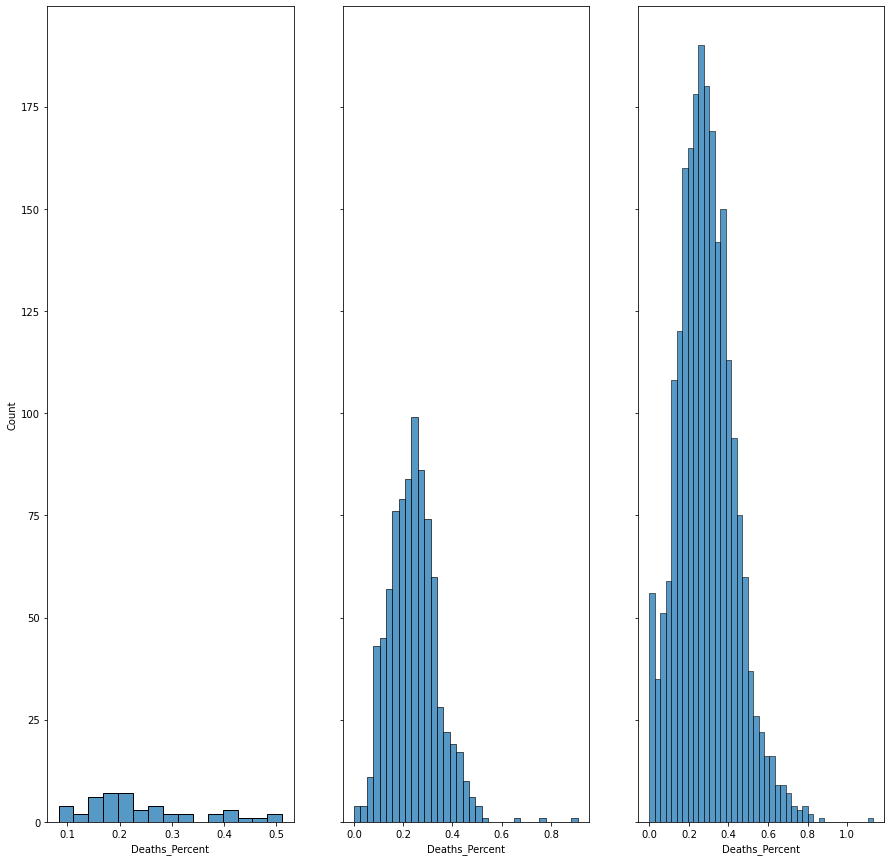

In [59]:
#break the pop density differently and see if more difference

fig, axes = plt.subplots(1,3, figsize=(15,15), sharey=True)


deathsFilt_urban2 = deaths_us[deaths_us['Pop_Density'] > 2500]
deathsFilt_middle2 = deaths_us[(deaths_us['Pop_Density'] > 100) & (deaths_us['Pop_Density'] < 2500)]
deathsFilt_rural2 = deaths_us[deaths_us['Pop_Density'] <= 100]

#sns.histplot(data=casesFilt_urban, x='Pop_Density', bins='auto')
sns.histplot(ax=axes[0], data=deathsFilt_urban2, x='Deaths_Percent', bins=15)
sns.histplot(ax=axes[1], data=deathsFilt_middle2, x='Deaths_Percent', bins='auto')
sns.histplot(ax=axes[2], data=deathsFilt_rural2, x='Deaths_Percent', bins='auto')



#plt.figure(figsize=(20,10))
plt.show()

In [60]:
deathsFilt_urban2.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Deaths_Percent,STCOU,LND110210D,Pop_Density
count,4.600000e+01,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000
mean,8.403685e+07,39.124072,-80.951528,2336.760870,36848.652174,8.608286e+05,0.243989,36848.652174,175.383696,8215.235790
std,1.487587e+04,2.886151,10.829968,2885.888026,14875.872528,9.773790e+05,0.111903,14875.872528,229.107140,11648.202101
min,8.400606e+07,27.931303,-122.438567,14.000000,6059.000000,7.042000e+03,0.083081,6059.000000,2.000000,2585.742582
25%,8.402772e+07,38.135316,-82.456593,282.500000,27719.750000,1.865928e+05,0.167410,27719.750000,35.762500,2838.940869
50%,8.403607e+07,39.236332,-77.138503,1388.500000,36071.000000,6.113420e+05,0.208723,36071.000000,69.765000,3924.297754
75%,8.405161e+07,40.760621,-74.333668,2914.750000,51607.500000,1.048228e+06,0.303732,51607.500000,239.302500,7914.126042
max,8.405508e+07,45.016253,-71.078504,11452.000000,55079.000000,5.194675e+06,0.511218,55079.000000,945.330000,69464.432764


In [61]:
deathsFilt_middle2.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Deaths_Percent,STCOU,LND110210D,Pop_Density
count,8.320000e+02,832.000000,832.000000,832.000000,832.000000,8.320000e+02,832.000000,832.000000,832.000000,832.000000
mean,8.403052e+07,37.762159,-86.793585,573.289663,30523.478365,2.561208e+05,0.239954,30523.478365,660.977716,433.578349
std,1.512291e+04,4.490551,12.351925,1276.907620,15122.911029,4.940057e+05,0.098837,15122.911029,1004.358908,464.747403
min,8.400100e+07,20.863996,-159.596679,0.000000,1003.000000,3.958000e+03,0.000000,1003.000000,5.470000,100.032720
25%,8.401804e+07,34.840110,-89.697506,148.000000,18040.500000,6.958750e+04,0.172446,18040.500000,375.265000,141.664265
50%,8.403301e+07,38.329890,-84.087030,292.500000,33012.000000,1.242865e+05,0.237064,33012.000000,517.460000,242.953737
75%,8.404210e+07,41.114283,-79.687148,565.250000,42095.500000,2.670950e+05,0.295667,42095.500000,715.467500,485.260677
max,8.405514e+07,61.149982,-69.105292,27074.000000,55139.000000,9.818605e+06,0.908833,55139.000000,20056.940000,2419.639073


In [62]:
deathsFilt_rural2.describe()

,UID,Lat,Long_,11/24/21,ID,Population,Deaths_Percent,STCOU,LND110210D,Pop_Density
count,2.262000e+03,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000,2262.000000
mean,8.403021e+07,38.684269,-94.504464,68.053050,30206.274978,24769.076481,0.287314,30206.274978,1306.243895,33.376306
std,1.515156e+04,5.573210,12.382396,87.147512,15151.562932,30583.496958,0.141875,15151.562932,4184.314584,26.558593
min,8.400100e+07,19.601212,-174.159600,0.000000,1001.000000,82.000000,0.000000,1001.000000,11.990000,0.038404
25%,8.401905e+07,34.530406,-99.870816,21.000000,19048.000000,8488.500000,0.189075,19048.000000,474.532500,9.962638
50%,8.402913e+07,38.330505,-93.178193,46.000000,29128.000000,16834.500000,0.276936,29128.000000,686.415000,27.954589
75%,8.404604e+07,42.458140,-85.713483,87.750000,46042.500000,31951.250000,0.371803,46042.500000,1030.172500,50.694629
max,8.405604e+07,69.314792,-67.628135,1153.000000,56045.000000,442179.000000,1.131542,56045.000000,145504.790000,99.861149


In [63]:
import geopandas as gpd